In [1]:
# Import packages and set numpy random seed
import numpy as np
# np.random.seed(5) 
import tensorflow as tf
tf.set_random_seed(2)
import sign_language # A prewritten file that we will use to get the vector form of our images.
import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-shuffled training and test datasets
# To save time we will build model only on 3 letters A, B and C each with 3000 images
(x_train, y_train), (x_test, y_test) = sign_language.load_data(size=9000)

Using TensorFlow backend.


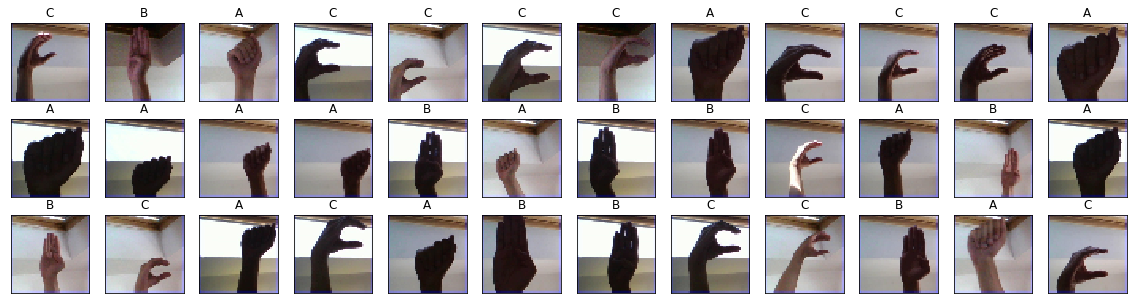

In [2]:
# visualize the training data
# Store labels of dataset
labels = ['A', 'B', 'C']

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

In [3]:
# Examine the Dataset, to verify that training and test sets have roughly equal proportions of classes

# Number of A's in the training dataset
num_A_train = sum(y_train==0)
# Number of B's in the training dataset
num_B_train = sum(y_train==1)
# Number of C's in the training dataset
num_C_train = sum(y_train==2)

# Number of A's in the test dataset
num_A_test = sum(y_test==0)
# Number of B's in the test dataset
num_B_test = sum(y_test==1)
# Number of C's in the test dataset
num_C_test = sum(y_test==2)

# Print statistics about the dataset
print("Training set:")
print("\tA: {}, B: {}, C: {}".format(num_A_train, num_B_train, num_C_train))
print("Test set:")
print("\tA: {}, B: {}, C: {}".format(num_A_test, num_B_test, num_C_test))

Training set:
	A: 2383, B: 2409, C: 2408
Test set:
	A: 617, B: 591, C: 592


In [4]:
# Generate One-Hot_encoded labels

from keras.utils import np_utils

# One-hot encode the training labels
y_train_OH = np_utils.to_categorical(y_train)

# One-hot encode the test labels
y_test_OH = np_utils.to_categorical(y_test)

In [5]:
# Build the model

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential
# tf.reset_default_graph()

model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
# Add a max pooling layer
model.add(MaxPooling2D((4,4)))
# Add a convolutional layer
model.add(Conv2D(filters=15, kernel_size=(5,5), activation='relu', padding='same'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(4,4)))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 5)         380       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        1890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 408       
Total params: 2,678
Trainable params: 2,678
Non-trainable params: 0
__

In [6]:
# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# Train the model
hist = model.fit(x_train, y_train_OH, validation_split=0.2, epochs=10, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 5760 samples, validate on 1440 samples
Epoch 1/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.8475 - acc: 0.6158 - val_loss: 0.6208 - val_acc: 0.7500
Epoch 2/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.4993 - acc: 0.7967 - val_loss: 0.4763 - val_acc: 0.7854
Epoch 3/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.3533 - acc: 0.8595 - val_loss: 0.2959 - val_acc: 0.8931
Epoch 4/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.2618 - acc: 0.8984 - val_loss: 0.2362 - val_acc: 0.9104
Epoch 5/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.1980 - acc: 0.9273 - val_loss: 0.4068 - val_acc: 0.8278
Epoch 6/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.1553 - acc: 0.9443 - val_loss: 0.1292 - val_acc: 0.9611
Epoch 7/10
5760/5760 [==============================] - 12s 2ms/step - loss: 0.1199 - acc: 0.9

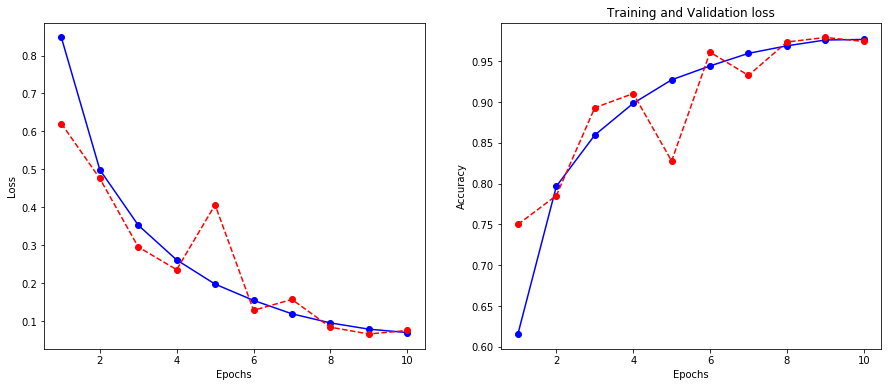

In [11]:
# visualize the training and validation loss

hist = model.history
epochs = range(1, len(hist.history['loss']) + 1)

plt.subplots(figsize=(15,6))
plt.subplot(121)
# "bo" is for "blue dot"
plt.plot(epochs, hist.history['loss'], 'bo-')
# b+ is for "blue crosses"
plt.plot(epochs, hist.history['val_loss'], 'ro--')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(epochs, hist.history['acc'], 'bo-')
plt.plot(epochs, hist.history['val_acc'], 'ro--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [12]:
# Obtain accuracy on test set
score = model.evaluate(x=x_test, y=y_test_OH,verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9883333333333333


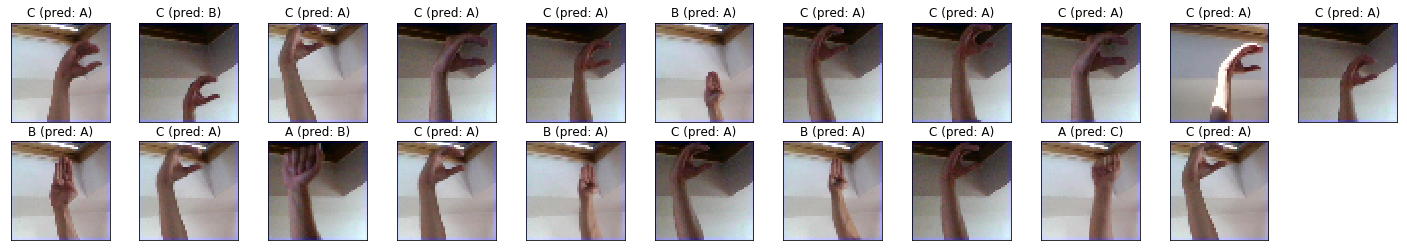

In [14]:
# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = np.array([np.argmax(prob) for prob in y_probs])

# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.array([i for i in range(len(y_preds)) if y_test[i]!=y_preds[i]])

# Print mislabeled examples
fig = plt.figure(figsize=(25,4))
for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, np.ceil(len(bad_test_idxs)/2), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))